In [1]:
#importing a required libraries.
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [2]:
dataset=pd.read_excel('Dataset.xlsx')
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
dataset.shape,dataset.isnull().sum()

((10683, 11),
 Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              1
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        1
 Additional_Info    0
 Price              0
 dtype: int64)

PREPROCESSING THE DATASET

In [4]:
dataset=dataset.dropna(axis=0)
dataset.shape


(10682, 11)

In [5]:
#Separating the Date_of Journey to respective columns of day, month and year.
dataset['Day_of_Travel']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.day


dataset['Month_of_Travel']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.month


dataset['Weekday'] = ((pd.DatetimeIndex(dataset.Date_of_Journey).dayofweek) // 5 == 1).astype(int)


dataset=dataset.drop(columns=['Date_of_Journey'])



C:\Users\Asus\AppData\Local\Temp/ipykernel_11556/3950535187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Day_of_Travel']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.day
C:\Users\Asus\AppData\Local\Temp/ipykernel_11556/3950535187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Month_of_Travel']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.month
C:\Users\Asus\AppData\Local\Temp/ipykernel_11556/3950535187.py:8: SettingWithCopyWarning: 
A value is tr

In [6]:
dataset

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,0
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,1
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,1
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,0


In [7]:
#Separating the Dep_time and Arrival_time to respective columns of Depart_hour, Depart_minute and Arrival_hour, Arrival_minute
dataset['Depart_Hour']=pd.to_datetime(dataset.Dep_Time).dt.hour
dataset['Depart_Minute']=pd.to_datetime(dataset.Dep_Time).dt.minute

dataset['Arrival_Hour']=pd.to_datetime(dataset.Arrival_Time).dt.hour
dataset['Arrival_Minute']=pd.to_datetime(dataset.Arrival_Time).dt.minute

dataset=dataset.drop(columns=['Dep_Time'])
dataset=dataset.drop(columns=['Arrival_Time'])


In [8]:
dataset

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,0,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,0,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,1,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,1,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,0,11,30,14,10


In [9]:
#adding extra two column whether journey is at night time or early morning time
#we have seen some flights have less fare at early morning and high price at late night so direct relation
#Considering that the late night flights are usually after 21:00
dataset['Night_Journey']=(dataset['Depart_Hour']>=21).astype(int)
dataset['Early_Morning_Journey']=((dataset['Depart_Hour']>=4) & (dataset['Depart_Hour']<=8)).astype(int)
dataset



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10,1,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,1,5,50,13,15,0,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,0,9,25,4,25,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,0,18,5,23,30,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,21,35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,0,19,55,22,25,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,1,20,45,23,20,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,1,8,20,11,20,0,1
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,0,11,30,14,10,0,0


In [10]:
# converting duration hour and minute into seprate columns
#function for training and test also

def extract_hour_minute(duration):
    hour=[]
    minute=[]

    for time in duration:
        minu=time.split(' ')
        count=len(minu)
        if count==2:
            h=minu[0].split('h')[0]
            hour.append(int(h))
            m=minu[1].split('m')[0]
            minute.append(int(m))
        elif minu[0][-1]=='m':
            hour.append(0)
            m=minu[0].split('m')[0]
            minute.append(int(m))
           #print(m)    
        elif minu[0][-1]=='h':
            minute.append(0)
            h=minu[0].split('h')[0]
            hour.append(int(h))
           #print(h)
    return hour,minute

dataset['Travel_Hour'],dataset['Travel_Minute']=extract_hour_minute(dataset['Duration'])

dataset=dataset.drop(columns=['Duration'])
dataset


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,4,25,0,0,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,23,30,0,0,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,21,35,0,0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,0,19,55,22,25,0,0,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,1,20,45,23,20,0,0,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,1,8,20,11,20,0,1,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,0,11,30,14,10,0,0,2,40


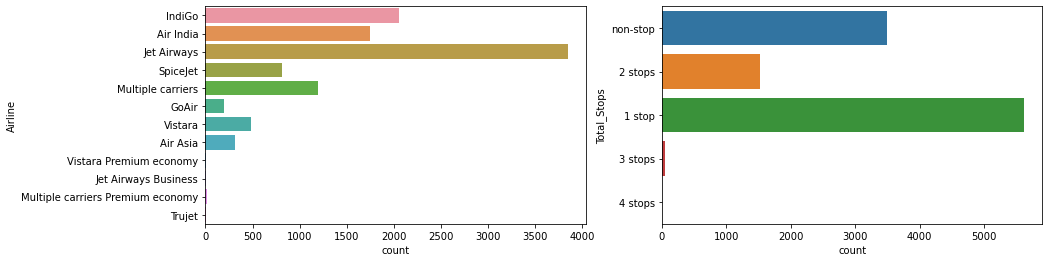

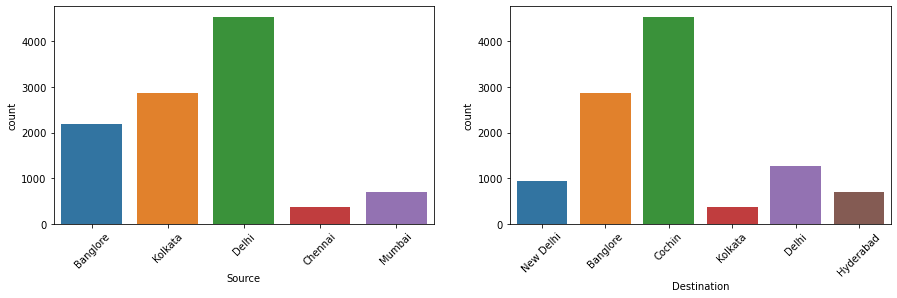

In [11]:
#Categorical Data Visualization
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(y=dataset['Airline'])

plt.subplot(1,2,2)
sns.countplot(y=dataset['Total_Stops'])
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=dataset['Source'])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x=dataset['Destination'])
plt.xticks(rotation=45)
plt.show()



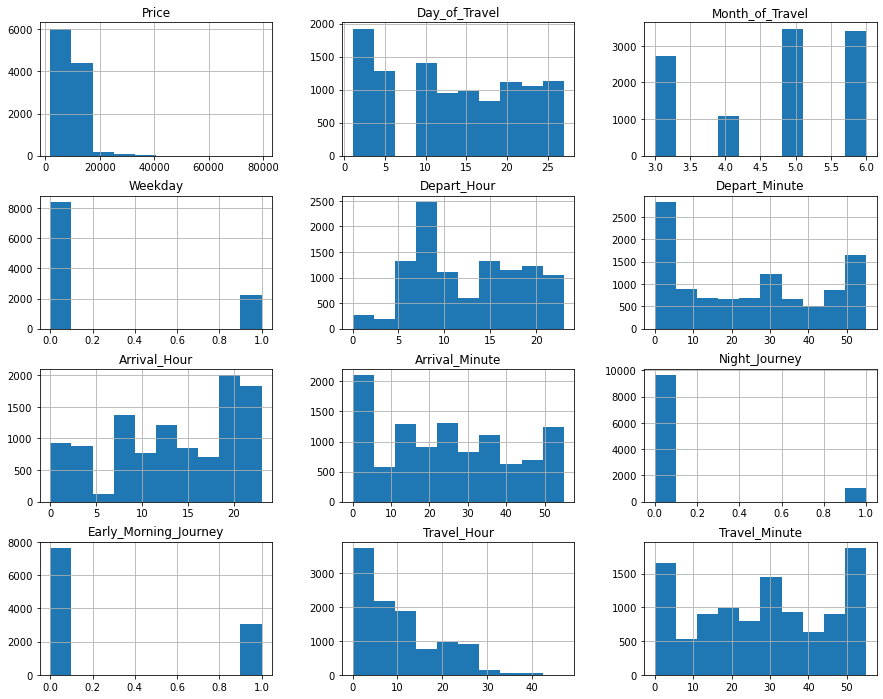

In [12]:
#histogram to check the data despersion
dataset.hist(figsize=(15,12))
plt.show()


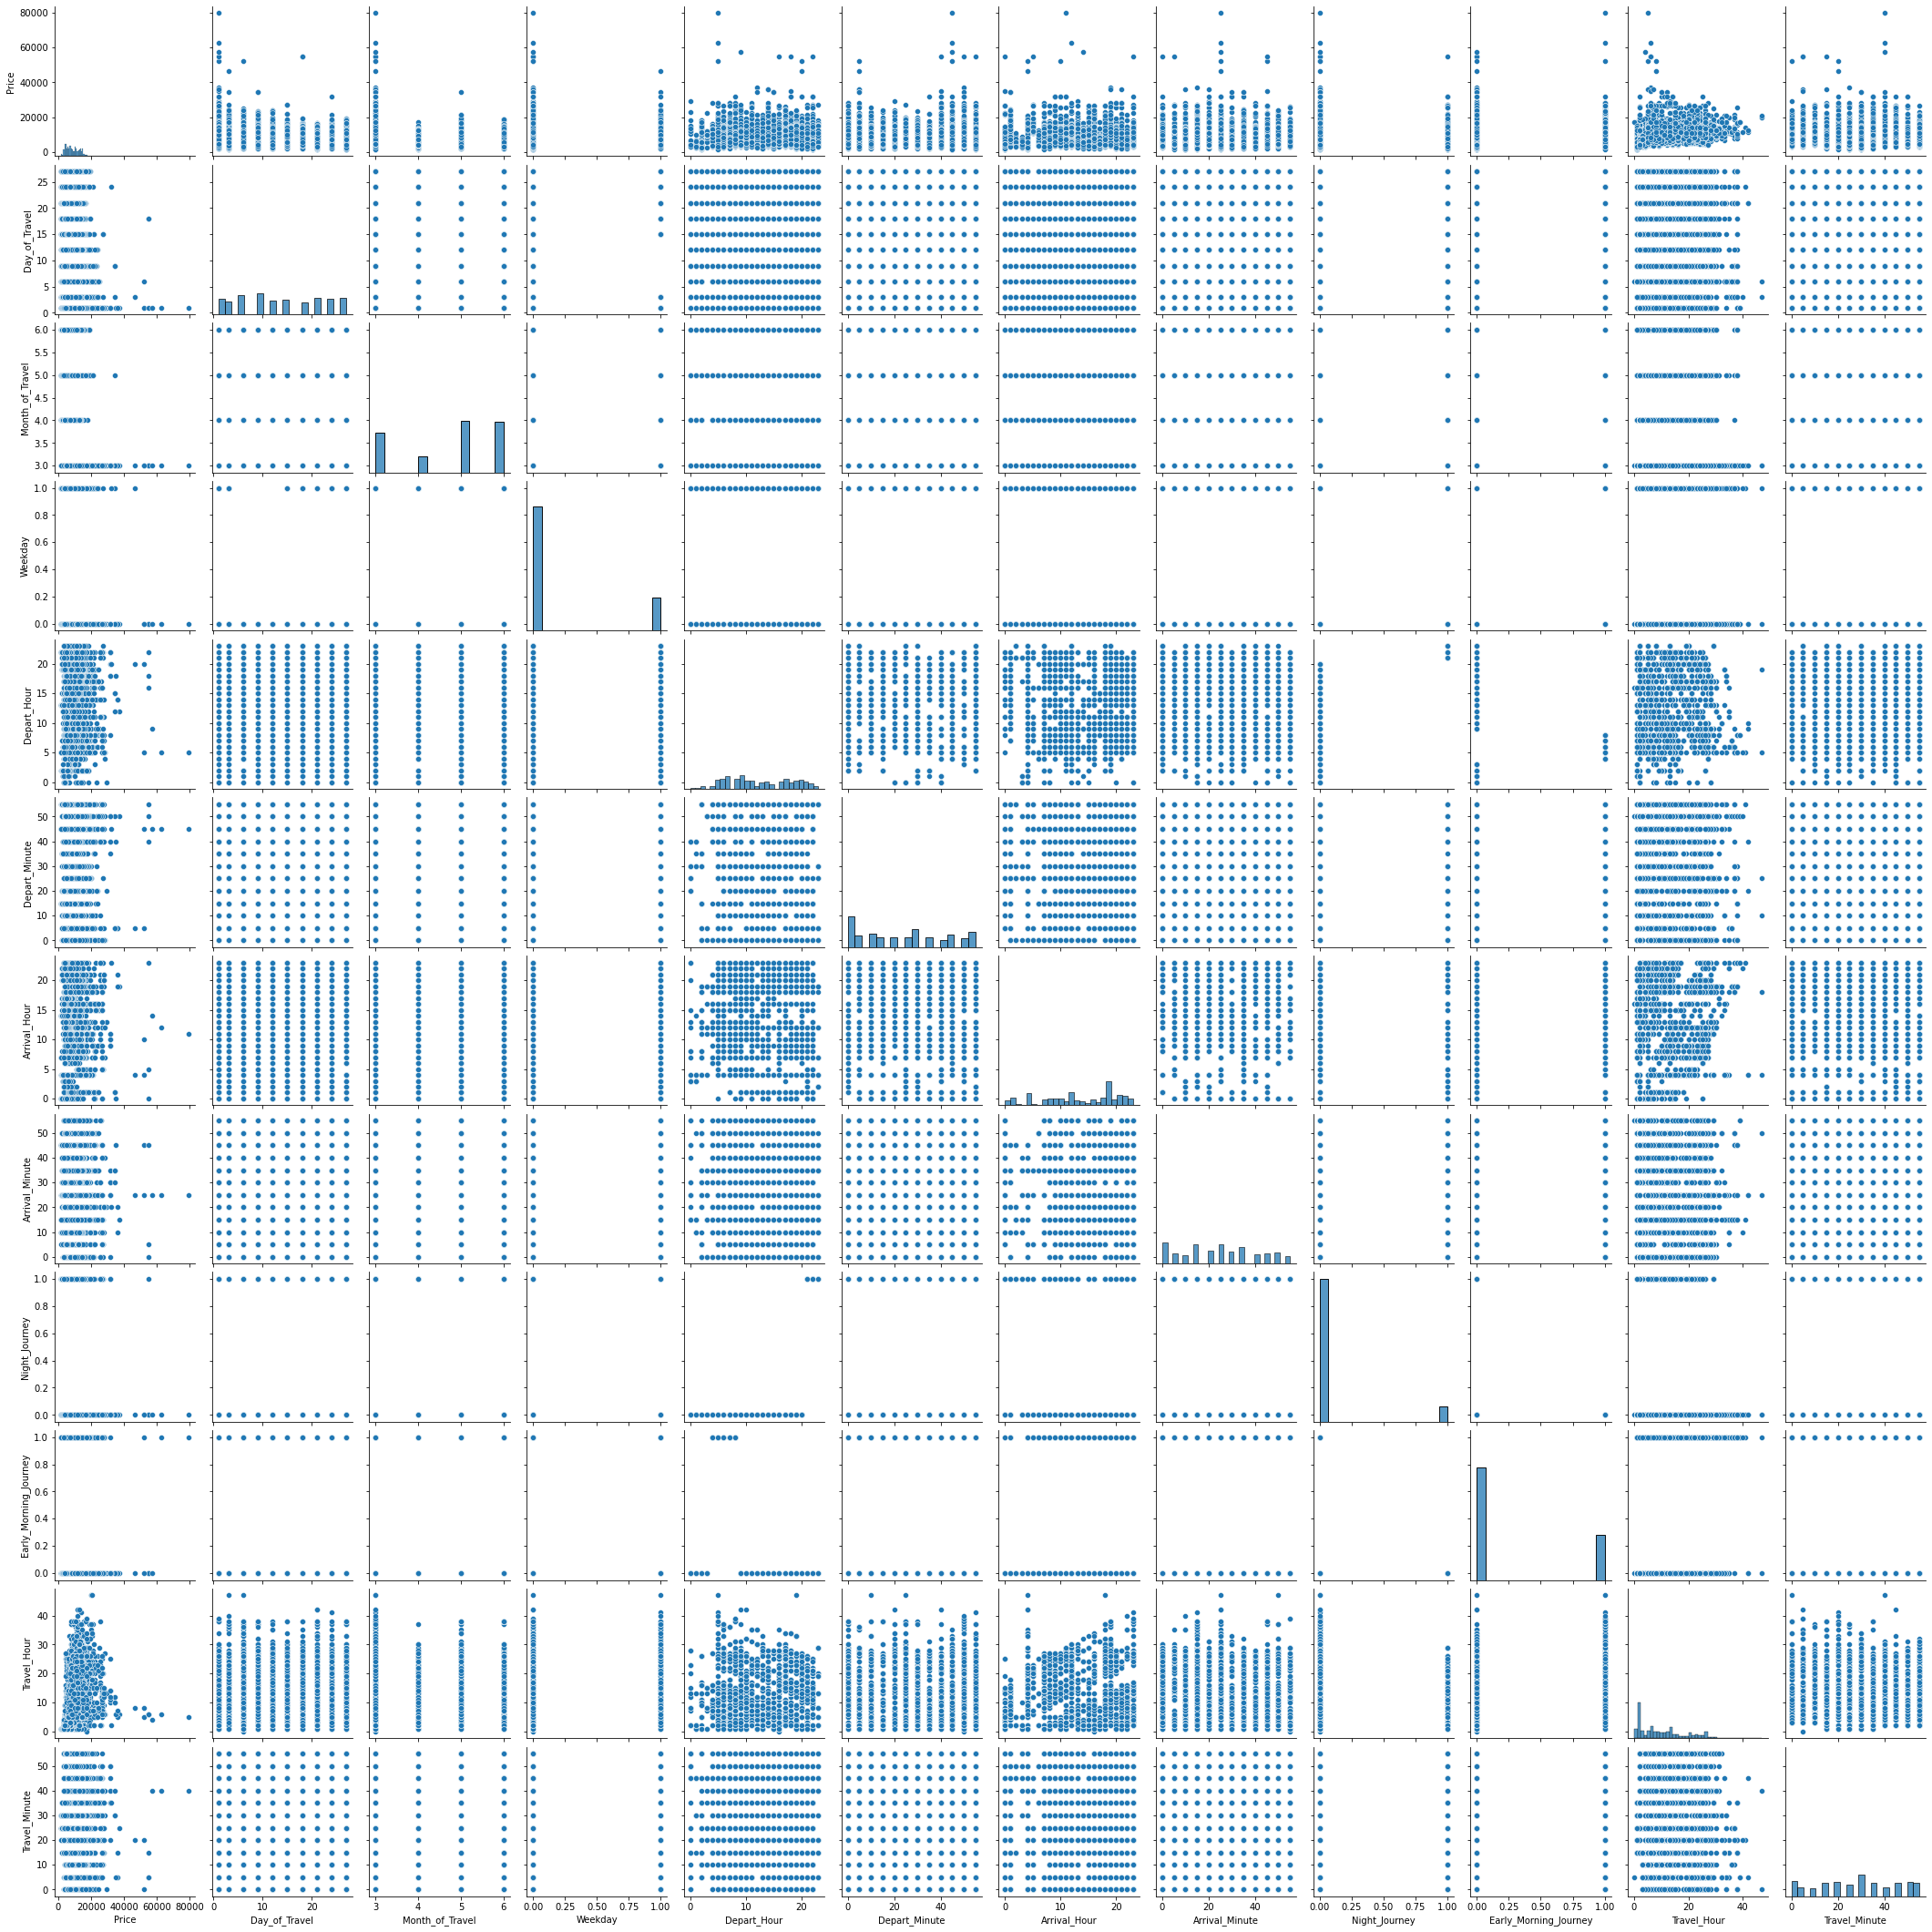

In [13]:
sns.pairplot(dataset)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


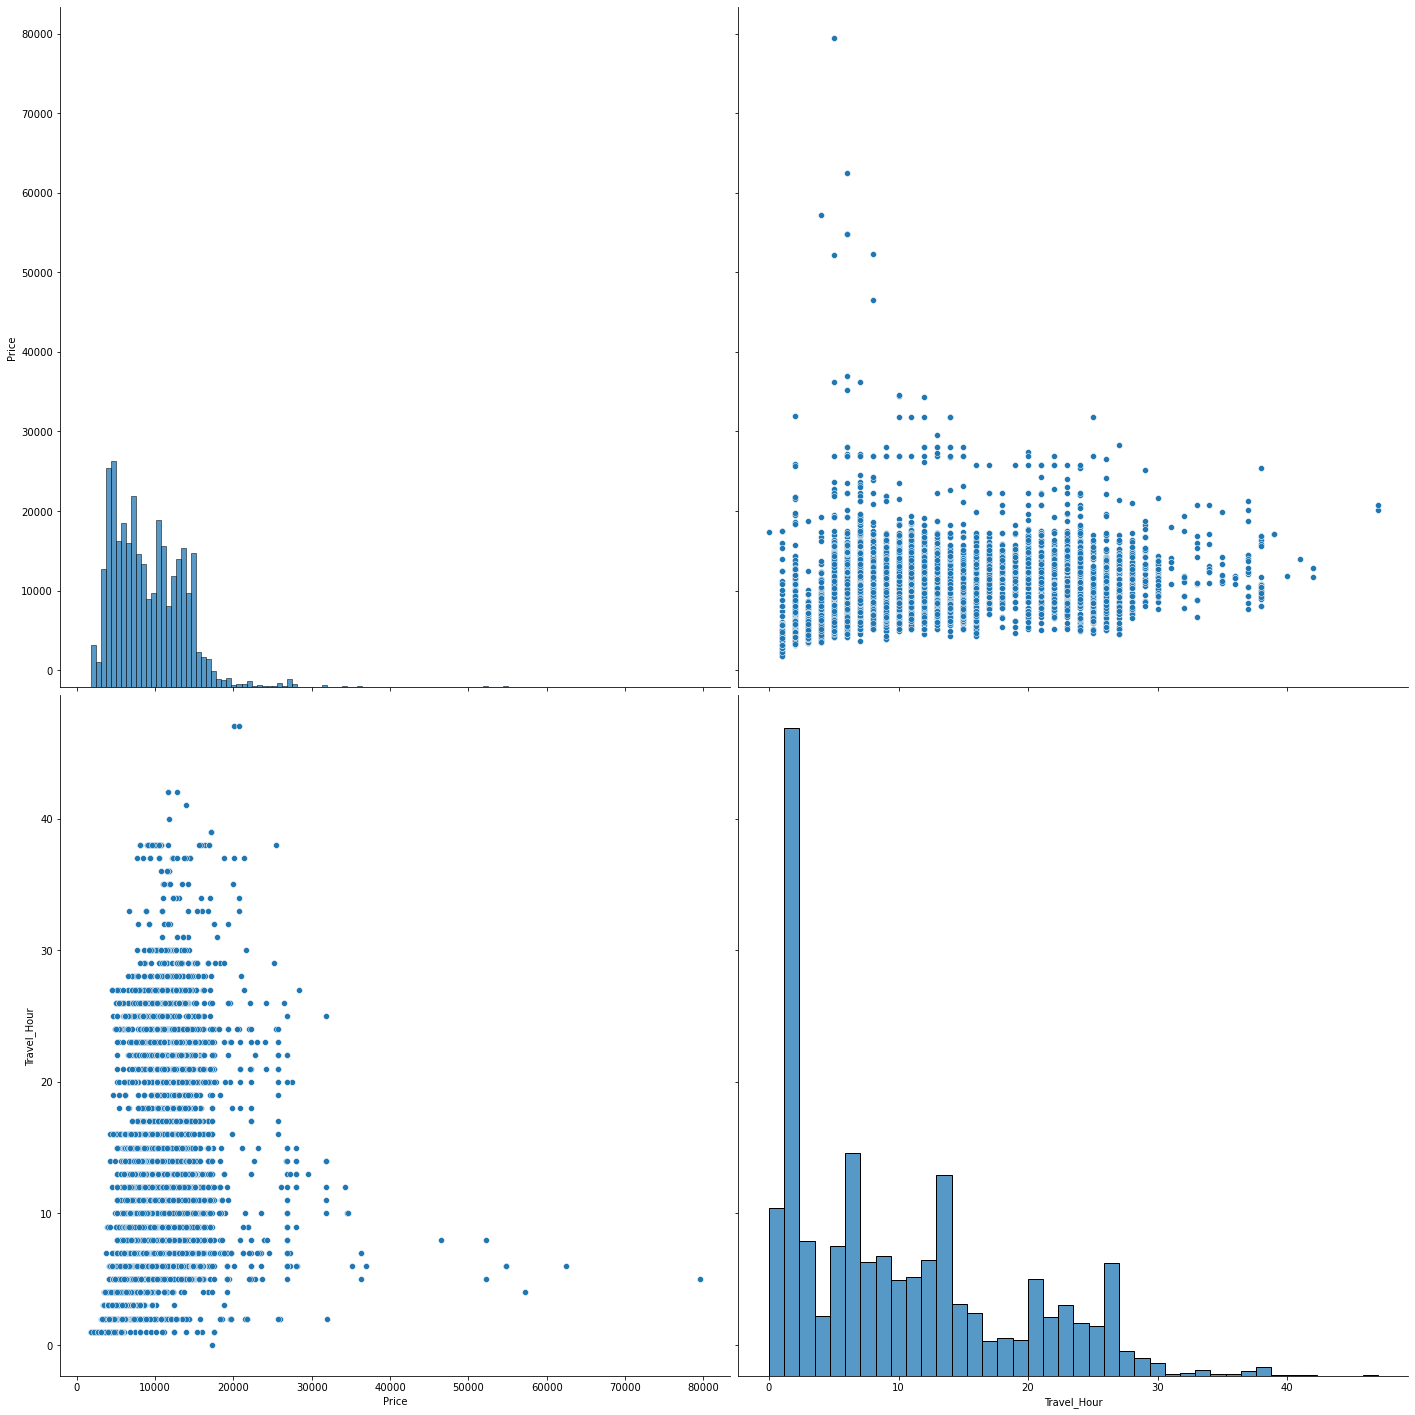

In [14]:
#checking the price and travel hour pair plot
sns.pairplot(data=dataset,vars=['Price','Travel_Hour'],size=10)


<AxesSubplot:xlabel='Travel_Hour'>

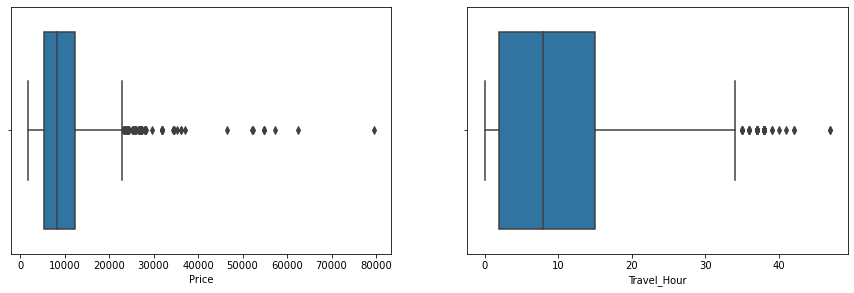

In [15]:
#box plot to find the outlier
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=dataset['Price'],data=dataset)
plt.subplot(2,2,2)
sns.boxplot(x=dataset['Travel_Hour'],data=dataset)

5277.0
12373.0
7096.0


<AxesSubplot:xlabel='Price'>

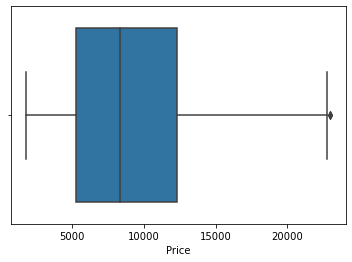

In [16]:
#price outlier check
Q1=dataset['Price'].quantile(0.25)
Q3=dataset['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

#price outlier removed
dataset=dataset[~((dataset['Price']>Q3+1.5*IQR)|(dataset['Price']<Q1-1.5*IQR))]
sns.boxplot(x=dataset['Price'],data=dataset)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


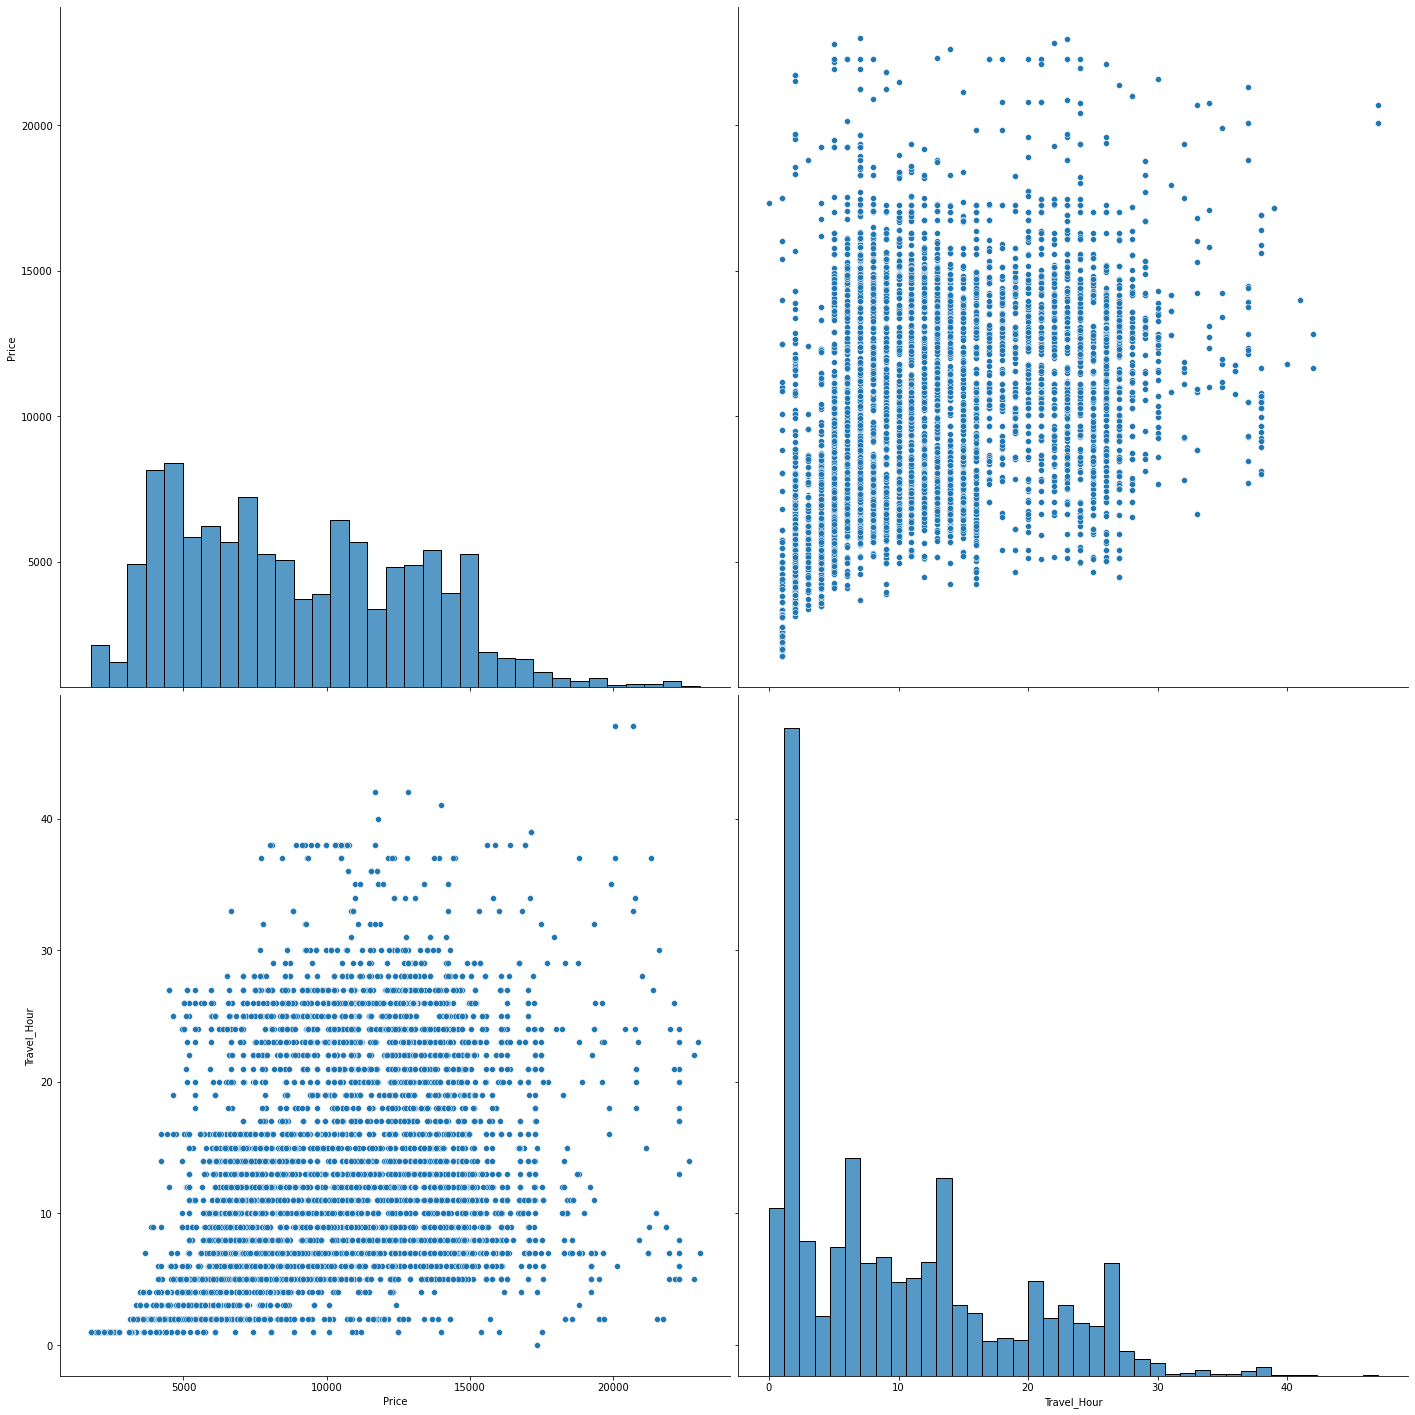

In [17]:
sns.pairplot(data=dataset,vars=['Price','Travel_Hour'],size=10)

In [18]:
#lets check any flight who has less travel minute and hour ==0
dataset[((dataset['Travel_Minute']<50) & (dataset['Travel_Hour']==0))]

#one record only five minutes travel from Mumbai to Hyderabad 
#impossible

#remove 
dataset=dataset[~((dataset['Travel_Minute']<50) & (dataset['Travel_Hour']==0))]
dataset[((dataset['Travel_Minute']<50) & (dataset['Travel_Hour']==0))]
dataset
#we are done with data preprocssig almost...
#label encoding remain to convert categorical column to unique int values

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,4,25,0,0,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,23,30,0,0,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,21,35,0,0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,0,19,55,22,25,0,0,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,1,20,45,23,20,0,0,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,1,8,20,11,20,0,1,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,0,11,30,14,10,0,0,2,40


In [19]:
dataset.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
Day_of_Travel             int64
Month_of_Travel           int64
Weekday                   int32
Depart_Hour               int64
Depart_Minute             int64
Arrival_Hour              int64
Arrival_Minute            int64
Night_Journey             int32
Early_Morning_Journey     int32
Travel_Hour               int64
Travel_Minute             int64
dtype: object

In [20]:
df_new=pd.concat([dataset.drop('Source',axis=1),pd.get_dummies(dataset['Source'],prefix='Source')],axis=1)
df_new=pd.concat([df_new.drop('Destination',axis=1),pd.get_dummies(df_new['Destination'],prefix='Destination')],axis=1)
dataset=df_new
dataset.head(5)

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,...,0,0,0,0,0,0,0,0,0,1


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

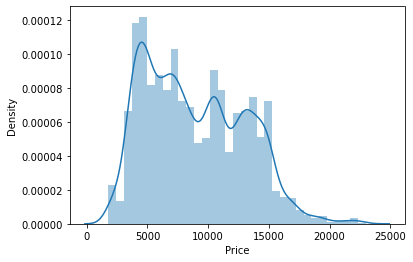

In [21]:
sns.distplot(dataset['Price'])

In [22]:
#columns Airline,Route,Total_Stops,Info can be encode 

dataset


#masking of object column
categorial_mask1=dataset.dtypes==object
# print(categorial_mask1)

#categorical columns
categorical_cols1=dataset.columns[categorial_mask1].tolist()
print(categorical_cols1)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


dataset[categorical_cols1]=dataset[categorical_cols1].apply(lambda col:le.fit_transform(col))


['Airline', 'Route', 'Total_Stops', 'Additional_Info']


In [74]:
pd.set_option('display.max_columns',None)
# dataset['Destination_New_Delhi']=dataset['Destination_New Delhi']
# dataset= dataset.drop('Destination_New Delhi',axis=1)
# dataset= dataset.drop('Route',axis=1)
dataset.iloc[10511]

Airline                     3
Route                     102
Total_Stops                 0
Additional_Info             5
Price                    8765
Day_of_Travel              21
Month_of_Travel             3
Weekday                     0
Depart_Hour                 9
Depart_Minute              10
Arrival_Hour                1
Arrival_Minute             35
Night_Journey               0
Early_Morning_Journey       0
Travel_Hour                16
Travel_Minute              25
Source_Banglore             0
Source_Chennai              0
Source_Delhi                1
Source_Kolkata              0
Source_Mumbai               0
Destination_Banglore        0
Destination_Cochin          1
Destination_Delhi           0
Destination_Hyderabad       0
Destination_Kolkata         0
Destination_New Delhi       0
Name: 10607, dtype: int64

In [24]:
dataset.describe()

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000,10587.000000
mean,3.731558,73.722206,1.468594,4.401152,8896.999433,13.605176,4.723718,0.213375,12.490507,24.324171,13.358270,24.689714,0.096817,0.284783,10.226315,28.333806,0.200718,0.035988,0.426939,0.271087,0.065269,0.271087,0.426939,0.119486,0.065269,0.035988,0.081232
std,2.026536,35.722068,1.809622,1.178212,4068.656519,8.446113,1.158385,0.409710,5.744939,18.728195,6.855504,16.530793,0.295722,0.451332,8.503340,16.963855,0.400556,0.186268,0.494657,0.444542,0.247011,0.444542,0.494657,0.324375,0.247011,0.186268,0.273204
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,47.000000,0.000000,5.000000,5228.000000,6.000000,4.000000,0.000000,8.000000,5.000000,8.000000,10.000000,0.000000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,72.000000,0.000000,5.000000,8355.000000,12.000000,5.000000,0.000000,11.000000,25.000000,14.000000,25.000000,0.000000,0.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,102.000000,4.000000,5.000000,12312.000000,21.000000,6.000000,0.000000,18.000000,40.000000,19.000000,35.000000,0.000000,1.000000,15.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,125.000000,4.000000,6.000000,23001.000000,27.000000,6.000000,1.000000,23.000000,55.000000,23.000000,55.000000,1.000000,1.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#feature extraction
X=dataset.drop(columns=['Price'])
y=dataset['Price']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8469, 26), (2118, 26), (8469,), (2118,))

In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#function declaration
def cross_validation(reg_model,X,y):
    
    score=cross_val_score(reg_model,X,y,scoring='neg_mean_squared_error',cv=10)
    rmse_score=np.sqrt(-score)
    
    print("\nScores ",rmse_score,'\n')
    print("Mean ",rmse_score.mean(),'\n')
    print("Standard Deviation ",rmse_score.std())
    

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Linear Regression")
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

Linear Regression
2860.321622641005
R2 Score  0.5112348473323446

Scores  [2902.16531341 3011.76463793 2880.4078951  2827.74737816 2862.51994475
 2745.27037825 2940.61028857 3028.55493251 2797.77998958 2849.72614871]
Mean  2884.6546906957637
Standard Deviation  84.99617455436861


,Price,Price Predicted
7733,4145,5396.717305
3521,13817,12525.564492
4059,4823,5020.250875
8987,22270,11622.776308
10265,10231,11107.965639
1056,6144,4456.947322
1548,4649,9095.095183
9606,9709,9868.867110
6626,13377,11765.962467
8453,5241,9947.920581


In [82]:
from sklearn.svm import SVR

reg=SVR(kernel='linear')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('SVR')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
print(cross_validation(reg,X_train,y_train))
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

SVR
2968.2051546704365
R2 Score  0.4736697560259806

Scores  [3043.70279167 3168.01001033 2986.6406095  2972.91686821 2982.47134318
 2907.44603805 3106.05727809 3177.3116349  2913.76557795 2938.06133033]
Mean  3019.6383482220667
Standard Deviation  94.88226696262858
None


,Price,Price Predicted
7733,4145,4769.463691
3521,13817,11164.497643
4059,4823,4541.562527
8987,22270,9601.339986
10265,10231,11383.175959
1056,6144,5231.426602
1548,4649,9112.926033
9606,9709,9069.221366
6626,13377,10320.792400
8453,5241,8123.971237


In [77]:
from sklearn.neighbors import KNeighborsRegressor

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('Kneighbours')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

Kneighbours
2009.2932596209334
R2 Score  0.7588111921114475

Scores  [2150.93075296 2331.84486369 2102.44945588 2274.05969271 2193.98004907
 2023.95904071 2285.96380271 2311.64784264 2076.10491438 2070.54595614]
Mean  2182.148637089577
Standard Deviation  107.04910614465693


,Price,Price Predicted
7733,4145,4250.000000
3521,13817,12515.000000
4059,4823,5142.000000
8987,22270,12718.000000
10265,10231,10441.000000
1056,6144,5676.000000
1548,4649,4649.000000
9606,9709,9850.666667
6626,13377,11884.333333
8453,5241,6482.333333


In [83]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('Random Forest Regressor')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
print(cross_validation(reg,X_train,y_train))
predicted_df=pd.DataFrame({'Price':y_test,'Price Predicted':y_pred})
predicted_df.head(10)

Random Forest Regressor
1097.052548510747
R2 Score  0.9281005848783267

Scores  [1141.40072802 1200.19130482 1092.87378261 1121.2882187  1065.14789827
 1054.44358338 1273.38709586 1260.84391783 1021.99567547 1077.57609393]
Mean  1130.9148298892333
Standard Deviation  82.77103068989423
None


,Price,Price Predicted
7733,4145,4219.550000
3521,13817,13800.680000
4059,4823,4933.150000
8987,22270,20094.480000
10265,10231,10347.810000
1056,6144,5139.780000
1548,4649,4661.600000
9606,9709,8637.640000
6626,13377,9038.911667
8453,5241,6132.070000


<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

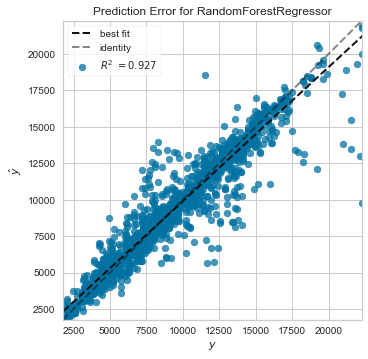

In [31]:
import yellowbrick
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
Lm = RandomForestRegressor()
visualizer = PredictionError(Lm) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

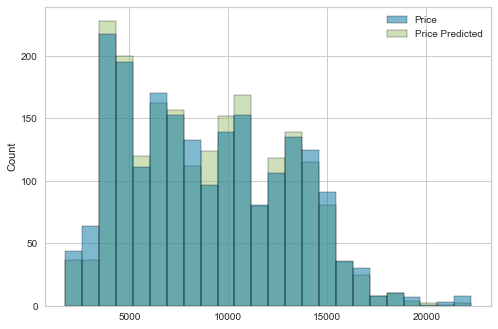

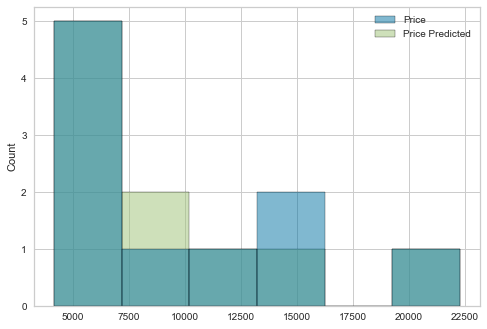

In [32]:
sorted_pred_df=predicted_df.sort_values('Price')
sns.histplot(sorted_pred_df)
plt.show()

sns.histplot(predicted_df.head(10))
plt.show()

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

reg=GradientBoostingRegressor(n_estimators=5,learning_rate=1,loss ='ls')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('Gradient Boosting Regressor')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

Gradient Boosting Regressor
1862.6253736030853
R2 Score  0.7927371212646167


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will 


Scores  [1788.2628375  1924.05467504 1785.46426109 1857.09378612 1754.09714634
 1671.63438842 1814.28114961 1826.45774398 1790.59582328 1771.00740137]
Mean  1798.2949212733486
Standard Deviation  62.75907388168693


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


,Price,Price Predicted
7733,4145,4651.733220
3521,13817,13008.235332
4059,4823,4643.668032
8987,22270,14823.572489
10265,10231,11334.928460
1056,6144,5621.940032
1548,4649,8406.746267
9606,9709,6436.282820
6626,13377,10083.974300
8453,5241,8044.744908


In [80]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print('Decision Tree Regressor')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
cross_validation(dtc,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

Decision Tree Regressor
1470.1675784548852
R2 Score  0.8708768303586834

Scores  [1339.20297034 1501.52619072 1441.41967141 1408.94807812 1459.58670866
 1341.34981245 1562.80796021 1605.29915579 1422.0115967  1322.17865722]
Mean  1440.4330801604415
Standard Deviation  90.35288107808695


,Price,Price Predicted
7733,4145,4145.0
3521,13817,13817.0
4059,4823,4823.0
8987,22270,22270.0
10265,10231,10231.0
1056,6144,4030.0
1548,4649,4649.0
9606,9709,9861.0
6626,13377,7198.0
8453,5241,5636.0


In [35]:
paramgrid={'n_estimators':[10,30,50,70,100,150],'max_depth':[None,1,2,3],'max_features':['auto','sqrt','log2'],'min_samples_split':[2,4,6,8,10]}
gcv_rfr=GridSearchCV(RandomForestRegressor(),paramgrid,cv=5)


In [36]:
res=gcv_rfr.fit(X_train,y_train)
res.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 50}

In [84]:
reg=RandomForestRegressor(n_estimators=50,max_depth=None , max_features='auto' , min_samples_split= 4)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('Random Forest Regressor after HyperParameter Tuning')
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score ",r2_score(y_test,y_pred))
#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

Random Forest Regressor after HyperParameter Tuning
1085.8211205091468
R2 Score  0.9295652356200974

Scores  [1132.87647626 1190.2851859  1127.20353618 1124.08554299 1080.13194195
 1044.85838048 1271.64770512 1266.21016894  986.47760624 1040.74729257]
Mean  1126.4523836627518
Standard Deviation  89.70922322669436


,Price,Price Predicted
7733,4145,4343.815048
3521,13817,13810.712000
4059,4823,4954.142000
8987,22270,19852.056333
10265,10231,10336.564143
1056,6144,5123.106619
1548,4649,4791.271333
9606,9709,8598.309286
6626,13377,9469.666714
8453,5241,6109.012619


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

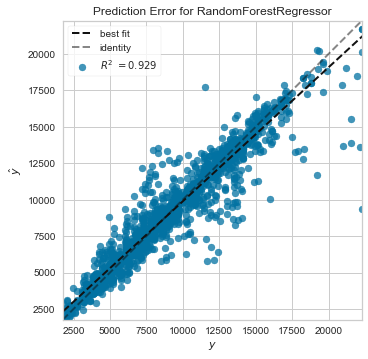

In [38]:
# Lm = RandomForestRegressor()
visualizer = PredictionError(reg) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

In [39]:
pickle.dump(reg, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns_diff.json","w") as f:
    f.write(json.dumps(columns))